In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
from matplotlib.path import Path
import ast
import pickle
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import networkx as nx

In [5]:
df = pd.read_csv("artworks_ordered.csv")
df[:5]

,Unnamed: 0.1,Unnamed: 0,id,name,path,center,area
0,5372,5372,txrg84,Flag of France,"{'109-164, T': [[249, 1469], [0, 1469], [0, 19...","{'109-164, T': [125, 1719]}",124500.0
1,1187,1187,twpyje,Flag of Germany,"{'109-166, T': [[0, 1121], [448, 1121], [447, ...","{'109-166, T': [992, 1148]}",96223.0
2,258,258,000354,The Nordic Union,"{'1-166, T': [[187, 93], [187, 97], [207, 97],...","{'1-166, T': [506, 129]}",89953.5
3,4866,4866,txd8wt,Central Alliance,"{'1-166, T': [[448, 890], [512, 890], [512, 90...","{'1-166, T': [447, 994]}",75325.5
4,7916,7916,ubyhtf,Netherlands,"{'56-166, T': [[297, 13], [297, 35], [886, 35]...","{'56-166, T': [1171, 19]}",54044.0


In [6]:
#df = df[35:40]
df = df[:5]

In [7]:
artworks = {}
id_count = 1
for row in df.itertuples():
    name = row.name
    path = row.path
    path = ast.literal_eval(path)
    coords = list(path.values())[0]
    artworks[id_count] = coords
    id_count += 1


In [28]:
# Flag of France
#art1 = [[125, 497], [175, 497], [175, 288], [171, 284], [171, 275], [148, 275], [148, 300], [141, 307], [141, 320], [152, 320], [152, 328], [125, 328], [125, 345], [132, 345], [132, 386], [125, 386]]
#flag of argentina
#art2 = [[1533, 1819], [1773, 1819], [1774, 1917], [1532, 1916]]


In [8]:
def find_points(art):
    x, y = np.meshgrid(np.arange(2000), np.arange(2000)) # make a canvas with coordinates
    x, y = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T 

    p = Path(art) # make a polygon
    grid = p.contains_points(points,radius = 0)
    mask = grid.reshape(2000,2000) # now you have a mask with points inside a polygon
    x,y = mask.nonzero()
    coords = []
    for xc,yc in zip(x,y):
        coords.append((xc,yc))
    return coords

In [29]:
art1_pixels = find_points(art1)
art2_pixels = find_points(art2)

In [30]:
s1 = set(art1_pixels)
s2 = set(art1_pixels)

In [31]:
pixel1 = {}
pixel2 = {}

In [8]:
CHUNK_SIZE = 3_000_000

f = open('prova.txt', 'w')


for key in tqdm(artworks.keys()):
    art_pixel = find_points(artworks[key])
    s = set(art_pixel)
    name = key
    
    with pd.read_csv(
            'reddit_place_2022_trimmed.csv',
            chunksize=CHUNK_SIZE,
            engine="c",
            dtype={'timestamp':np.uint32,
              'user_id':np.uint32,
              'pixel_color':np.uint8,
              'x':np.uint16,
              'y':np.uint16,}
        ) as csv:
            for chunk in tqdm(csv):
                for row in chunk.itertuples():
                    user = row.user_id
                    x = row.x
                    y = row.y
                    if (x,y) in s:
                            f.write(str(name) + ' ' + str(user) + '\n')
f.close()

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [9]:
CHUNK_SIZE = 3_000_000
MIN_TILES = 100
f = open('prova.txt', 'w')
counter = 0

for key in tqdm(artworks.keys()):
    art_pixel = find_points(artworks[key])
    s = set(art_pixel)
    name = key
    user_actions = {}

    with pd.read_csv(
            'reddit_place_2022_trimmed.csv',
            chunksize=CHUNK_SIZE,
            engine="c",
            dtype={'timestamp':np.uint32,
              'user_id':np.uint32,
              'pixel_color':np.uint8,
              'x':np.uint16,
              'y':np.uint16,}
        ) as csv:
            for chunk in tqdm(csv):
                for row in chunk.itertuples():
                    user = row.user_id
                    x = row.x
                    y = row.y
                    if (x,y) in s:
                        if  user in user_actions:
                            user_actions[user] = user_actions[user] + 1 
                        else:
                            user_actions[user] = 1
               
    for user_key in user_actions.keys():
        if user_actions[user_key] > MIN_TILES:
            f.write(str(name) + ' ' + str(user_key) + '\n')
            counter +=  1
    print(counter)
f.close()

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

6964


In [26]:
f = open('prova.txt', 'w')

for user_key in user_actions.keys():
    print(user_key)
    if user_actions[user_key] > 5:
        f.write(str(name) + ' ' + str(user) + '\n')
        counter +=  1
    break
f.close()

111


In [80]:
l = []
for user_key in user_actions.keys():
    if user_actions[user_key] > 100:
        l.append(user_actions[user_key])

In [81]:
min(l)

101

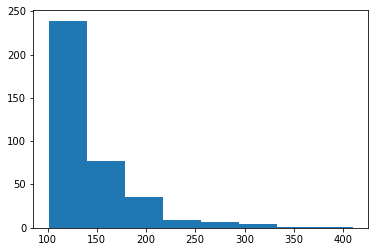

In [82]:
hist, bins, _ = plt.hist(l, bins=8)

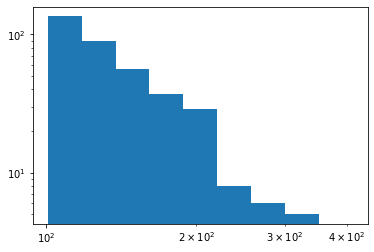

In [83]:
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),10)
plt.hist(l, bins=logbins)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [29]:
user_actions[3]

40

In [23]:
counter

129154

In [20]:
len(user_actions.keys())

1219430

In [7]:
def create_coords_users(chunk,pixel,s):
    for row in chunk.itertuples():
        user = row.user_id
        x = row.x
        y = row.y
        if (x,y) in s:
            if (x,y) in pixel:
                pixel[(x,y)].append(user)
            else: 
                pixel[(x,y)] = [user]

In [8]:
CHUNK_SIZE = 1_000_000

with pd.read_csv(
        'reddit_place_2022_trimmed.csv',
        chunksize=CHUNK_SIZE,
        engine="c",
        dtype={'timestamp':np.uint32,
          'user_id':np.uint32,
          'pixel_color':np.uint8,
          'x':np.uint16,
          'y':np.uint16,}
    ) as csv:
        for chunk in tqdm(csv):
            create_coords_users(chunk,pixel1,s1)

0it [00:00, ?it/s]

In [9]:
with pd.read_csv(
        'reddit_place_2022_trimmed.csv',
        chunksize=CHUNK_SIZE,
        engine="c",
        dtype={'timestamp':np.uint32,
          'user_id':np.uint32,
          'pixel_color':np.uint8,
          'x':np.uint16,
          'y':np.uint16,}
    ) as csv:
        for chunk in tqdm(csv):
            create_coords_users(chunk,pixel2,s2)

0it [00:00, ?it/s]

In [10]:
edges1 = []
for key in pixel1.keys():
    for user in pixel1[key]:
        edges1.append((user,key))

In [11]:
edges2 = []
for key in pixel2.keys():
    for user in pixel2[key]:
        edges2.append((user,key))

In [12]:
edges = edges1 + edges2
len(edges)

758364

In [33]:
from networkx.algorithms import bipartite
import networkx as nx

In [15]:
user = list(range(10381144))

In [16]:
pixel = list(pixel1.keys()) + list(pixel2.keys()) 

In [17]:
B = nx.Graph()
B.add_nodes_from(user, bipartite=0)
B.add_nodes_from(pixel, bipartite=1)
# Add edges only between nodes of opposite node sets
#B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
B.add_edges_from(edges)


In [20]:
nx.is_bipartite(B)

True

In [ ]:
nx.degree(B)

In [3]:
from networkx.algorithms import bipartite
import networkx as nx

In [4]:
G=nx.Graph()
fh=open('prova.txt','r')
for line in fh.readlines():
    s=line.strip().split()
    G.add_node(s[0],bipartite=0)
    G.add_node(int(s[1]),bipartite=1)
    G.add_edge(s[0],int(s[1]))
fh.close()        

In [5]:
nx.is_bipartite(G)

True

In [6]:
top = nx.bipartite.sets(G)[1]
len(top)

6903

In [7]:
bottom = nx.bipartite.sets(G)[0]


In [8]:
B = bipartite.projected_graph(G,bottom, multigraph=False)

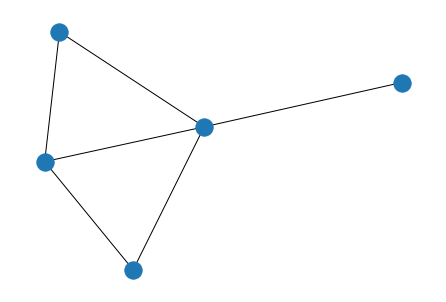

In [9]:
nx.draw(B)

In [15]:
A = bipartite.projected_graph(G,top, multigraph=False)

In [ ]:
nx.draw(A, pos=pos) #with_labels=True, node_color=['green','green','green','green','blue','blue','blue'])
plt.show()

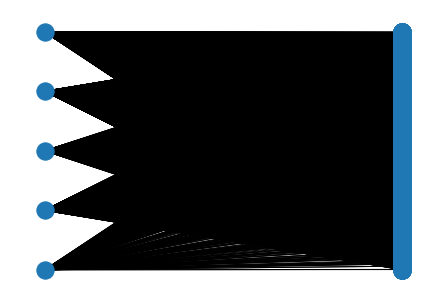

In [12]:
top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)
nx.draw(G, pos=pos) #with_labels=True, node_color=['green','green','green','green','blue','blue','blue'])
plt.show()

In [3]:
from igraph import *

In [4]:
g = Graph.Bipartite([0, 1, 0, 1], [(0, 1), (2, 3), (0, 3)])

In [5]:
g.degree()

[2, 1, 1, 2]

In [6]:
g.get_adjacency()

Matrix([[0, 1, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 1, 0]])

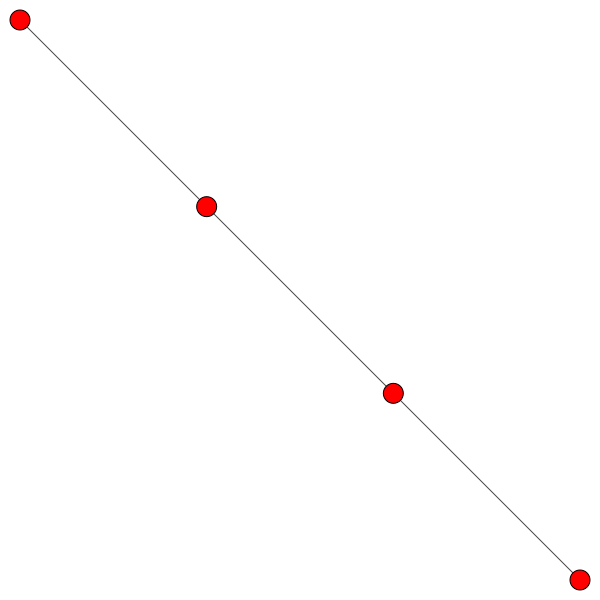

In [7]:
layout = g.layout("kk")

plot(g, layout=layout)

In [ ]:
graph_draw(g, vertex_text=g.vertex_index, output="two-nodes.pdf")